# Importation des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import sys
from time import time
from nltk.corpus import stopwords
from nltk.tokenize.regexp import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import FrenchStemmer
from nltk import FreqDist
from wordcloud import WordCloud
from PIL import Image
from collections import Counter , defaultdict 
import pickle
%matplotlib inline
sns.set() 

# Importer stopwords de la classe nltk.corpus
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora, models
import pandas as pd
import gensim
from nltk.stem import PorterStemmer
import string
import nltk

# Importations du corpus de texte

In [2]:
file1 = open("/Users/Bedoucha/Desktop/De gaulle/De_gaulle_1_1940.txt", "r", encoding='utf-8')
## Vérifie que l'encoding est bon.
text1 = file1.read()
file1.close()

file2 = open("/Users/Bedoucha/Desktop/De gaulle/de_gaulle_2_1940.txt", "r", encoding='utf-8')
text2 = file2.read()
file2.close()

file3 = open("/Users/Bedoucha/Desktop/De gaulle/de_gaulle_3_1940.txt", "r", encoding='utf-8')
text3 = file3.read()
file3.close()

file4 = open("/Users/Bedoucha/Desktop/De gaulle/de_gaulle_1_1941.txt", "r", encoding='utf-8')
text4 = file4.read()
file4.close()

file5 = open("/Users/Bedoucha/Desktop/De gaulle/de_gaulle_2_1941.txt", "r", encoding='utf-8')
text5 = file5.read()
file5.close()

file6 = open("/Users/Bedoucha/Desktop/De gaulle/de_gaulle_1_1942.txt", "r", encoding='utf-8')
text6 = file6.read()
file6.close()

file7 = open("/Users/Bedoucha/Desktop/De gaulle/de_gaulle_2_1942.txt", "r", encoding='utf-8')
text7 = file7.read()
file7.close()

file8 = open("/Users/Bedoucha/Desktop/De gaulle/de_gaulle_1_1943.txt", "r", encoding='utf-8')
text8 = file8.read()
file8.close()

file9 = open("/Users/Bedoucha/Desktop/De gaulle/de_gaulle_1_1944.txt", "r", encoding='utf-8')
text9 = file9.read()
file9.close()

file10 = open("/Users/Bedoucha/Desktop/De gaulle/de_gaulle_2_1944.txt", "r", encoding='utf-8')
text10 = file10.read()
file10.close()

file11 = open("/Users/Bedoucha/Desktop/De gaulle/de_gaulle_1_1946.txt", "r", encoding='utf-8')
text11 = file11.read()
file11.close()

file12 = open("/Users/Bedoucha/Desktop/De gaulle/de_gaulle_2_1946.txt", "r", encoding='utf-8')
text12 = file12.read()
file12.close()

file13 = open("/Users/Bedoucha/Desktop/De gaulle/de_gaulle_1_1947.txt", "r", encoding='utf-8')
text13 = file13.read()
file13.close()

file14 = open("//Users/Bedoucha/Desktop/De gaulle/de_gaulle_1_1948.txt", "r", encoding='utf-8')
text14 = file14.read()
file14.close()

file15 = open("/Users/Bedoucha/Desktop/De gaulle/de_gaulle_1_1958.txt", "r", encoding='utf-8')
text15 = file15.read()
file15.close()

file16 = open("/Users/Bedoucha/Desktop/De gaulle/de_gaulle_2_1958.txt", "r", encoding='utf-8')
text16 = file16.read()
file16.close()

file17 = open("/Users/Bedoucha/Desktop/De gaulle/de_gaulle_3_1958.txt", "r", encoding='utf-8')
text17 = file17.read()
file17.close()

file18 = open("/Users/Bedoucha/Desktop/De gaulle/de_gaulle_4_1958.txt", "r", encoding='utf-8')
text18 = file18.read()
file18.close()

file19 = open("/Users/Bedoucha/Desktop/De gaulle/de_gaulle_1_1959.txt", "r", encoding='utf-8')
text19 = file19.read()
file19.close()

file20 = open("/Users/Bedoucha/Desktop/De gaulle/de_gaulle_1_1960.txt", "r", encoding='utf-8')
text20 = file20.read()
file20.close()

file21 = open("/Users/Bedoucha/Desktop/De gaulle/de_gaulle_1_1961.txt", "r", encoding='utf-8')
text21 = file21.read()
file21.close()

file22 = open("/Users/Bedoucha/Desktop/De gaulle/de_gaulle_1_1962.txt", "r", encoding='utf-8')
text22 = file22.read()
file22.close()

file23 = open("/Users/Bedoucha/Desktop/De gaulle/de_gaulle_1_1968.txt", "r", encoding='utf-8')
text23 = file23.read()
file23.close()

file24 = open("/Users/Bedoucha/Desktop/De gaulle/de_gaulle_2_1968.txt", "r", encoding='utf-8')
text24 = file24.read()
file24.close()

file25 = open("/Users/Bedoucha/Desktop/De gaulle/de_gaulle_1_1969.txt", "r", encoding='utf-8')
text25 = file25.read()
file25.close()

text = text1 + text2 + text3 + text4 + text5 + text6 + text7 + text8 + text9 + text10 + text11 + text12 + text13 + text14 + text15 + text16 + text17 + text18 + text19 + text20 + text21 + text22 + text23 + text24 + text25

text1940_1945 = text1 + text2 + text3 + text4 + text5 + text6 + text7 + text8 + text9 + text10
text1946_1957 = text11 + text12 + text13 + text14
text1958_1969 = text15 + text16 + text17 + text18 + text19 + text20 + text21 + text22 + text23 + text24 + text25

# Tokenisation du corpus de texte

In [3]:
text = nltk.tokenize.word_tokenize(text)
text1940_1945 = nltk.tokenize.word_tokenize(text1940_1945)
text1946_1957 = nltk.tokenize.word_tokenize(text1946_1957)
text1958_1969 = nltk.tokenize.word_tokenize(text1958_1969)

In [4]:
print("La taille du corpus de textes des années {} à {} est : {}".format(1940,1945,len(text1940_1945)))
print("La taille du corpus de textes des années {} à {} est : {}".format(1946,1957,len(text1946_1957)))
print("La taille du corpus de textes des années {} à {} est : {}".format(1958,1969,len(text1958_1969)))
print("La taille totale du corpus de textes des années : ",len(text))

La taille du corpus de textes des années 1940 à 1945 est : 8516
La taille du corpus de textes des années 1946 à 1957 est : 6858
La taille du corpus de textes des années 1958 à 1969 est : 12650
La taille totale du corpus de textes des années :  28022


# Mise à jour du corpus de texte avec les stops words

In [5]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('french'))
stop_words.update(["?", "!", ".", ",", ":", ";", "-", "--", "...", '"', "'",'’'])
#print(stop_words)

In [6]:
def stop_words_filtering(text) : 
    tokens = []
    for mot in text:
        if not mot.lower() in stop_words:
            tokens.append(mot)
    return tokens

text = stop_words_filtering(text)
text1940_1945 = stop_words_filtering(text1940_1945)
text1946_1957 = stop_words_filtering(text1946_1957)
text1958_1969 = stop_words_filtering(text1958_1969)

In [7]:
print("La taille du corpus de textes des années {} à {} est : {}".format(1940,1945,len(text1940_1945)))
print("La taille du corpus de textes des années {} à {} est : {}".format(1946,1957,len(text1946_1957)))
print("La taille du corpus de textes des années {} à {} est : {}".format(1958,1969,len(text1958_1969)))
print("La taille totale du corpus de textes des années : ",len(text))

La taille du corpus de textes des années 1940 à 1945 est : 4094
La taille du corpus de textes des années 1946 à 1957 est : 3453
La taille du corpus de textes des années 1958 à 1969 est : 6235
La taille totale du corpus de textes des années :  13782


# Implémentation du TF-IDF

france 171.95851961423122
peuple 57.0
état 56.0
pays 55.0
monde 53.0
guerre 52.0
nation 51.0
république 50.57212770126309
française 47.0
ennemi 44.0
gouvernement 41.0
algérie 39.0
nationale 38.0
victoire 34.0
hommes 27.0
politique 27.0
pouvoir 25.0
action 24.0
avenir 23.0
françaises 23.0


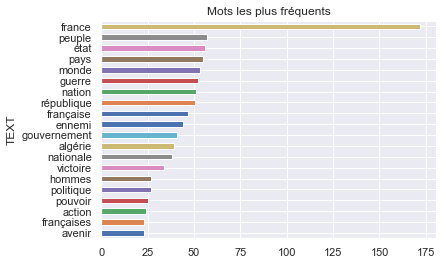

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer


def get_top_n_words(text, n=None):
    
    # Initialiser la variable des mots vides
     stop_words = set(stopwords.words('french'))
     stop_words.update(['tout','plus','fait','voilà','faut','toujours','temps','pouvoirs',
    'enfin','pourquoi','moment','si','mesure','quand','celui','ans','part','vive','faire','quant','alors','aucune','toute','donc','comme','aujourd','hui','dont','sans','tous','toutes','bien','où','cette','peut','milieu','peu','elles','parce','entre','entres','ils','dit','plus','moins','font','doit','dis','là','dessus','mêmes','ceux','ci','çi','dire','aussi','car','cela','fois','sous','général','depuis','autre','ni','entre','grande','leurs','leur','abord','chacun','être','autres','être','avec','contre','deux','français'])
     
     # Création de la transformation TF-IDF
     vectorizer = TfidfVectorizer(analyzer=u'word',lowercase=True,stop_words=set(stop_words),max_features=15000) 
     vectorizer.fit(text)
     # print(vectorizer.vocabulary_)
     # print(vectorizer.idf_)
     # encode document
     bag_of_words = vectorizer.fit_transform(text)
     # print(vector.shape)
     # print(vector.toarray())
    
     sum_words = bag_of_words.sum(axis=0) 
     words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
     words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
     return words_freq[:n]

# Application de la fonction
common_words_text_tot = get_top_n_words(text, 20)
common_words_1940_1945 = get_top_n_words(text1940_1945, 20)
common_words_1946_1957 = get_top_n_words(text1946_1957, 20)
common_words_1958_1969 = get_top_n_words(text1958_1969, 20)


for word, freq in common_words_text_tot:
    print(word, freq)

df_text_tot = pd.DataFrame(common_words_text_tot, columns = ['TEXT' , 'count'])
df_text_tot.groupby('TEXT').sum()['count'].sort_values(ascending=True).plot(
    kind='barh',title = 'Mots les plus fréquents')
plt.show()

france 75.49958044560395
ennemi 41.0
guerre 36.0
nation 23.0
victoire 19.0
empire 18.0
alliés 16.0
gouvernement 14.0
patrie 14.0
peuple 14.0
française 14.0
paris 13.0
seule 12.0
territoire 12.0
bataille 12.0
forces 12.0
hommes 12.0
monde 11.0
francais 11.0
françaises 11.0


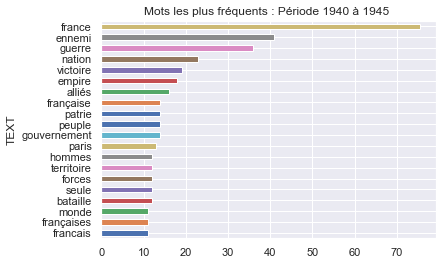

In [9]:
for word, freq in common_words_1940_1945:
    print(word, freq)
    
df_text_1940_1945 = pd.DataFrame(common_words_1940_1945, columns = ['TEXT' , 'count'])
df_text_1940_1945.groupby('TEXT').sum()['count'].sort_values(ascending=True).plot(
    kind='barh',title = 'Mots les plus fréquents : Période 1940 à 1945 ')
plt.show()

france 30.0
état 25.0
française 20.0
monde 16.0
pays 16.0
peuple 16.0
union 14.0
nation 12.0
nationale 12.0
institutions 12.0
victoire 11.0
partis 11.0
action 11.0
entreprise 10.0
assemblée 10.0
république 9.0
liberté 8.0
avenir 8.0
vie 8.0
indépendance 8.0


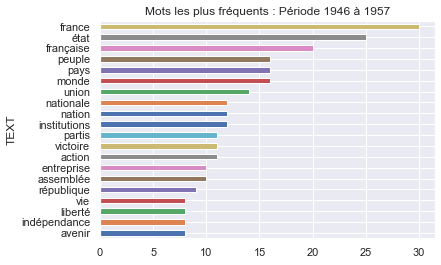

In [10]:
for word, freq in common_words_1946_1957:
    print(word, freq)

df_text_1946_1957 = pd.DataFrame(common_words_1946_1957, columns = ['TEXT' , 'count'])
df_text_1946_1957.groupby('TEXT').sum()['count'].sort_values(ascending=True).plot(
    kind='barh',title = 'Mots les plus fréquents : Période 1946 à 1957')
plt.show()

france 66.52083959669878
république 40.552814654316684
algérie 38.0
pays 30.0
état 29.0
peuple 27.0
monde 26.0
algériens 22.0
gouvernement 20.0
nationale 20.0
politique 16.0
nation 16.0
économique 14.0
française 13.0
régime 13.0
constitution 13.0
pouvoir 13.0
tâche 11.0
avenir 11.0
population 11.0


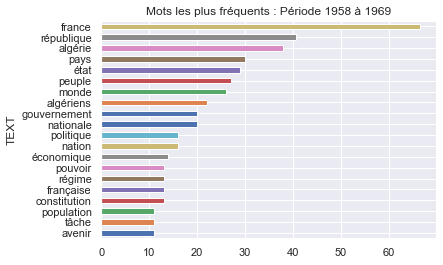

In [11]:
for word, freq in common_words_1958_1969:
    print(word, freq)

df_text_1958_1969 = pd.DataFrame(common_words_1958_1969, columns = ['TEXT' , 'count'])
df_text_1958_1969.groupby('TEXT').sum()['count'].sort_values(ascending=True).plot(
    kind='barh',title = 'Mots les plus fréquents : Période 1958 à 1969')
plt.show()

outre mer 7.0
etats unis 1.0
franco allemande 1.0
révérend père 1.0
états unis 1.0
père défaite 1.0
france message 1.0
petits enfants 1.0
palais bourbon 1.0
fort engagement 1.0
république mesdames 1.0
haut commissariat 1.0
france émeute 1.0
chef lieu 1.0
rhône alpes 1.0
pierre bénite 1.0
franche comté 1.0


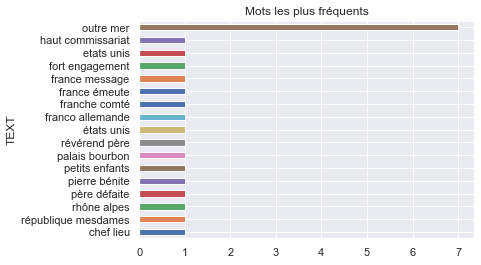

In [12]:
# Distribution des bigrammes les plus fréquent après suppression des stop words

def get_top_n_bigram(corpus, n,stop_words):
    # Initialiser la variable des mots vides
     stop_words = set(stopwords.words('french'))
     stop_words.update(['tout','plus','fait','voilà','prenant','pêle','avant','mont','blanc','saint','dominique','place','dix','huit','mêle','vis','dien','phu','faut','toujours','temps','pouvoirs','enfin','pourquoi','moment','si','mesure','quand','celui','ans','part','vive','faire','quant','alors','aucune','toute','donc','comme','aujourd','hui','dont','sans','tous','toutes','bien','où','cette','peut','milieu','peu','elles','parce','entre','entres','ils','dit','plus','moins','font','doit','dis','là','dessus','mêmes','ceux','ci','çi','dire','aussi','car','cela','fois','sous','général','depuis','autre','ni','entre','grande','leurs','leur','abord','chacun','être','autres','être','avec','contre','deux','français'])
    
     # création de la transformation TF-IDF
     vectorizer = TfidfVectorizer(ngram_range=(2, 2),analyzer=u'word',lowercase=True,stop_words=set(stop_words),max_features=15000)  #TfidfVectorizer(analyzer=u'word',max_df=0.95,lowercase=True,stop_words=set(my_stop_words),max_features=15000)
     # tokenize and build vocab
     vectorizer.fit(text)
     # summarize
     # print(vectorizer.vocabulary_)
     # print(vectorizer.idf_)
    # encode document
     bag_of_words = vectorizer.fit_transform(text)
     # summarize encoded vector
     # print(vector.shape)
     # print(vector.toarray())
    
     sum_words = bag_of_words.sum(axis=0) 
     words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
     words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
     return words_freq[:n]

# Application de la fonction
common_words_text_tot_bigram = get_top_n_bigram(text, 20,stop_words)
common_words_1940_1945_bigram = get_top_n_bigram(text1940_1945, 20,stop_words)
common_words_1946_1957_bigram = get_top_n_bigram(text1946_1957, 20,stop_words)
common_words_1958_1969_bigram = get_top_n_bigram(text1958_1969, 20,stop_words)


for word, freq in common_words_text_tot_bigram :
    print(word, freq)


df_text_tot_bigram = pd.DataFrame(common_words_text_tot_bigram, columns = ['TEXT' , 'count'])
df_text_tot_bigram.groupby('TEXT').sum()['count'].sort_values(ascending=True).plot(
    kind='barh',title = 'Mots les plus fréquents')
plt.show()


In [13]:
text_copie = text1 + text2 + text3 + text4 + text5 + text6 + text7 + text8 + text9 + text10 + text11 + text12 + text13 + text14 + text15 + text16 + text17 + text18 + text19 + text20 + text21 + text22 + text23 + text24 + text25

text1940_1945_copie = text1 + text2 + text3 + text4 + text5 + text6 + text7 + text8 + text9 + text10
text1946_1957_copie = text11 + text12 + text13 + text14
text1958_1969_copie = text15 + text16 + text17 + text18 + text19 + text20 + text21 + text22 + text23 + text24 + text25

# Visualisation des nuages de mots

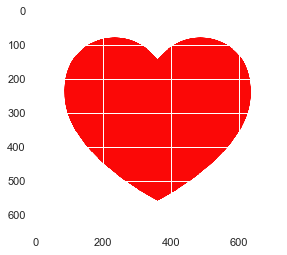

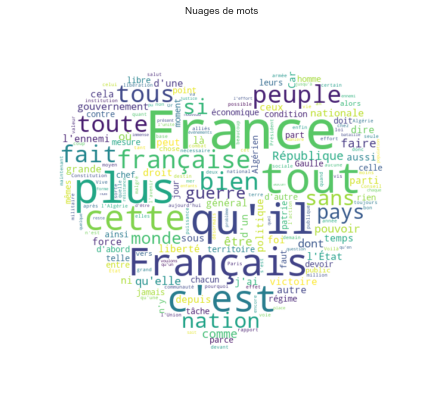

In [14]:
from PIL import Image
from wordcloud import  ImageColorGenerator
import numpy as np
import os
os.chdir("/Users/Bedoucha/Desktop/")

import matplotlib.image as mpimg
img = mpimg.imread("coeur.png")
plt.imshow(img)
plt.show()

def plot_word_cloud(text,title, masque) :
    # Définir un masque
    mask = np.array(Image.open("coeur.png"))

    # Définir le calque du nuage des mots
    wc = WordCloud(width=600,height=600,background_color="white", max_words=200, stopwords=stop_words, mask = mask, max_font_size=90,collocations = False, random_state=42)

    # Générer et afficher le nuage de mots
    plt.figure(figsize= (10,7))
    wc.generate(text)
    plt.imshow(wc,interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=10, pad=10)
    plt.show()


plot_word_cloud(text_copie,"Nuages de mots", "coeur.png")



                   1940-1945 :                    


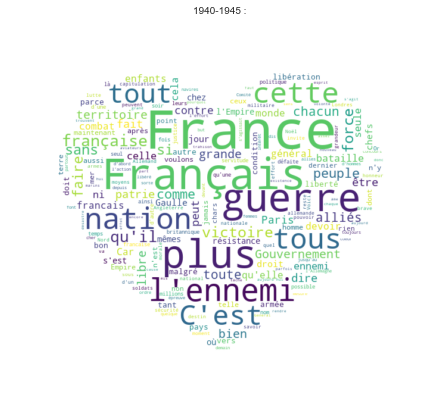

                   1946-1957 :                    


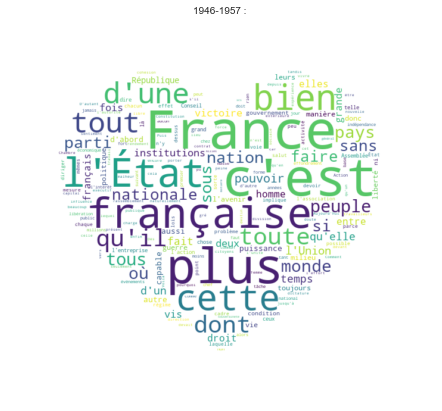

                   1958-1969 :                    


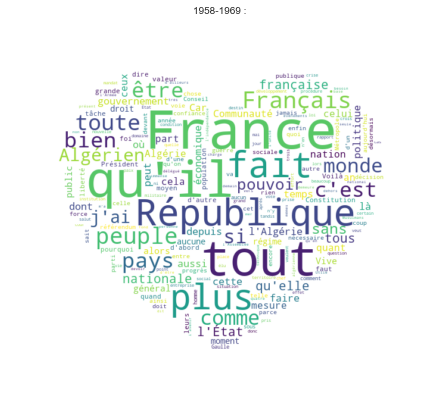

In [15]:
Date = ['1940-1945 : ','1946-1957 : ','1958-1969 : ']

j=0
for i in [text1940_1945_copie,text1946_1957_copie,text1958_1969_copie] :
    date = Date[j].center(50)
    print(date)
    j+=1
    plot_word_cloud(i,Date[j-1],"CDG.jpg")


# Analyse de sentiments

In [16]:
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

text_2 = text1 + text2 + text3 + text4 + text5 + text6 + text7 + text8 + text9 + text10 + text11 + text12 + text13 + text14 + text15 + text16 + text17 + text18 + text19 + text20 + text21 + text22 + text23 + text24 + text25
phrases = sent_tokenize(text_2, language='french')

df = pd.DataFrame({'phrases': phrases},
                      index = list(range(1,len(phrases)+1)))
sid = SentimentIntensityAnalyzer()

df["sentiments_Vader"] = df["phrases"].apply(lambda x: sid.polarity_scores(x))

In [17]:
df_new = pd.concat([df.drop(['sentiments_Vader'], axis=1), df['sentiments_Vader'].apply(pd.Series)], axis=1)
df_new.columns = ['phrases', 'negative','neutre','positive','sentiment_score']
df_new.head()

,phrases,negative,neutre,positive,sentiment_score
1,"Les chefs qui, depuis de nombreuses annees, so...",0.000,1.000,0.0,0.00
2,"Ce gouvernement, alleguant la defaite de nos a...",0.124,0.876,0.0,-0.34
3,"Certes, nous avons ete, nous sommes, submerges...",0.000,1.000,0.0,0.00
4,"Infiniment plus que leur nombre, ce sont les c...",0.000,1.000,0.0,0.00
5,"Ce sont les chars, les avions, la tactique des...",0.000,1.000,0.0,0.00


In [18]:
df_new.sentiment_score.mean()

-0.0050372049102927335

La moyenne de la variable sentiment_score proche de 0 => commentaires neutres comme on peut l'attendre d'un Président.